# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [102]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics



Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [103]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


**Discovery**: familiarizing 
- Feature selection
- 

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [104]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [105]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [106]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [107]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [108]:
# Generate basic descriptive stats
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [109]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [110]:
# Drop rows with missing values
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

# check
data.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [111]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [112]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [#, claim_status, video_id, video_duration_sec, video_transcription_text, verified_status, author_ban_status, video_view_count, video_like_count, video_share_count, video_download_count, video_comment_count]
Index: []


In [113]:
# validate claim status
data['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [114]:
# create a list of numeric engagement features that might be helpful for analysis
engagement_features = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

Check for and handle outliers.

In [115]:
# While we can see from describe() lets confirm whether log transformation is useful for normalization of engagement_features
# compare the medians to the top 90 percentile to determine statistical significance of skew

# if the ratio of the 90th percentile to the median is greater than 1.5 we'll consider it skewed
results = {'Metric': [], 'Median': [], '90th Percentile': [], 'Ratio (90th Percentile / Median)': []}

# calculate median, 90th percentile, and the ratio
for metric in engagement_features:
    median_val = data[metric].median()
    perc_90_val = data[metric].quantile(0.90)
    ratio = perc_90_val / median_val
    
    results['Metric'].append(metric)
    results['Median'].append(median_val)
    results['90th Percentile'].append(perc_90_val)
    results['Ratio (90th Percentile / Median)'].append(ratio)

results_df = pd.DataFrame(results)
results_df 

,Metric,Median,90th Percentile,Ratio (90th Percentile / Median)
0,video_view_count,9954.5,803355.9,80.702788
1,video_like_count,3403.5,293689.7,86.290495
2,video_share_count,717.0,58197.4,81.167922
3,video_download_count,46.0,3576.7,77.754348
4,video_comment_count,9.0,1120.0,124.444444


**Conclusion**: The ratio of 90th percentile to median is greater than 1 for each engagement metric providing strong evidence for right-skewedness. This rationalizes using log transformation for normalization.

In [116]:
# apply log transformation to the engagement metrics
# add 1 to avoid the log(0) issue
data['log_video_view_count'] = np.log1p(data['video_view_count'])
data['log_video_like_count'] = np.log1p(data['video_like_count'])
data['log_video_share_count'] = np.log1p(data['video_share_count'])
data['log_video_download_count'] = np.log1p(data['video_download_count'])
data['log_video_comment_count'] = np.log1p(data['video_comment_count'])

# check
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,log_video_view_count,log_video_like_count,log_video_share_count,log_video_download_count,log_video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,12.746351,9.874368,5.488938,0.693147,0.000000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,11.855650,11.256173,9.854035,7.057898,6.529419
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,13.712576,11.489565,7.958227,6.726233,5.799093
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,12.988848,12.388207,10.457746,7.118826,6.371612
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,10.936102,10.462760,8.321422,6.306275,5.030438


In [209]:
# setting a simple accessible visualization style
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
claim_color ="#003f5c"
opinion_color ="#bc5090"

# set up the style
sns.set_palette(colors)

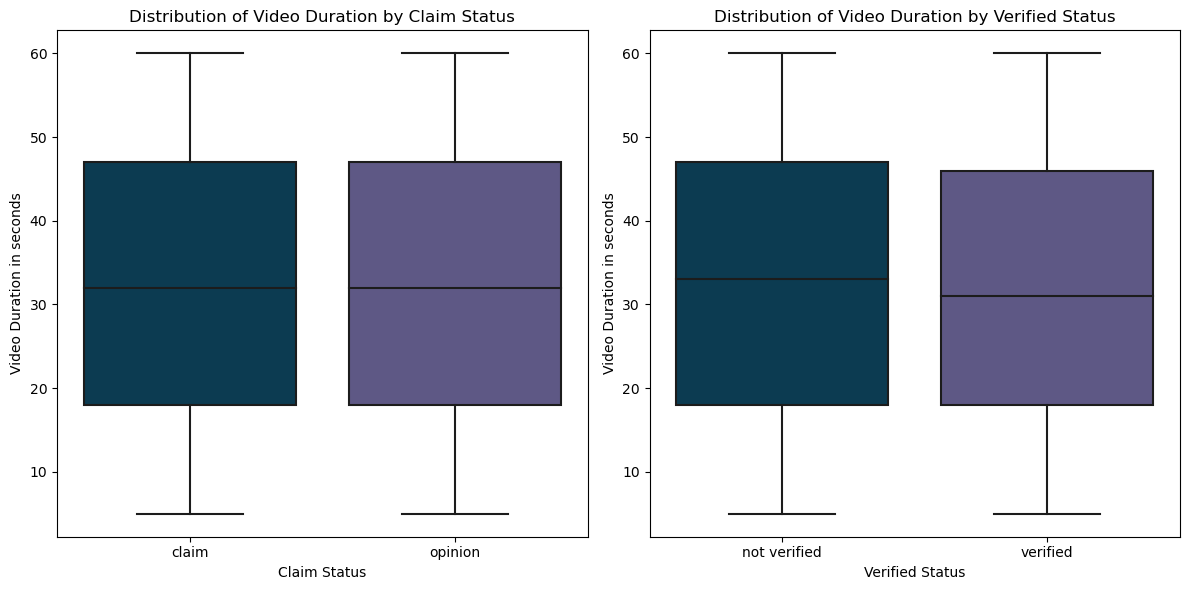

In [118]:
# Create a boxplot to visualize distribution of `video_duration_sec`

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# boxplot for claim status
sns.boxplot(ax=axes[0], x='claim_status', y='video_duration_sec', data=data)
axes[0].set_xlabel('Claim Status')
axes[0].set_ylabel('Video Duration in seconds')
axes[0].set_title('Distribution of Video Duration by Claim Status')

# boxplot for verified status
sns.boxplot(ax=axes[1], x='verified_status', y='video_duration_sec', data=data)
axes[1].set_xlabel('Verified Status')
axes[1].set_ylabel('Video Duration in seconds')
axes[1].set_title('Distribution of Video Duration by Verified Status')

# Adjust layout
plt.tight_layout()
plt.show()

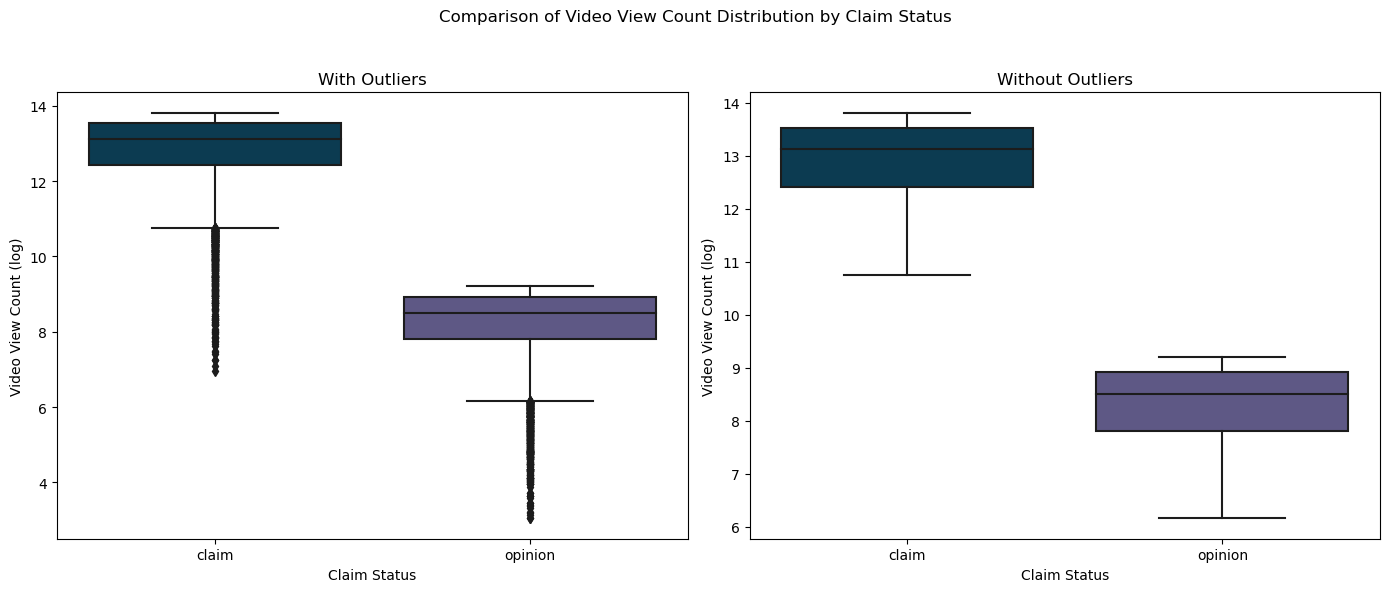

In [119]:
# Create boxplots to visualize distribution of `log_video_view_count` with and without outliers

plt.figure(figsize=(14, 6))

# boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='claim_status', y='log_video_view_count', data=data, showfliers=True)
plt.xlabel('Claim Status')
plt.ylabel('Video View Count (log)')
plt.title('With Outliers')

# boxplot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='claim_status', y='log_video_view_count', data=data, showfliers=False)
plt.xlabel('Claim Status')
plt.ylabel('Video View Count (log)')
plt.title('Without Outliers')

plt.suptitle('Comparison of Video View Count Distribution by Claim Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

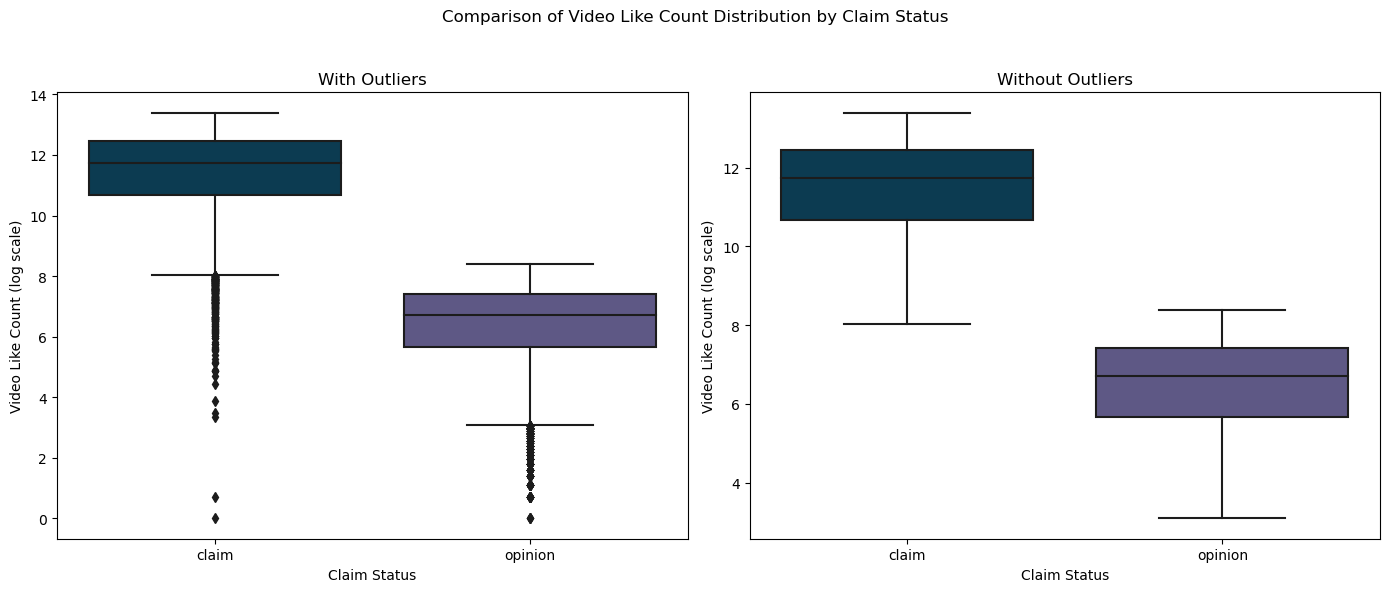

In [120]:
# Create boxplots to visualize distribution of `log_video_like_count` with and without outliers

plt.figure(figsize=(14, 6))

# boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='claim_status', y='log_video_like_count', data=data, showfliers=True)
plt.xlabel('Claim Status')
plt.ylabel('Video Like Count (log scale)')
plt.title('With Outliers')

# boxplot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='claim_status', y='log_video_like_count', data=data, showfliers=False)
plt.xlabel('Claim Status')
plt.ylabel('Video Like Count (log scale)')
plt.title('Without Outliers')

plt.suptitle('Comparison of Video Like Count Distribution by Claim Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

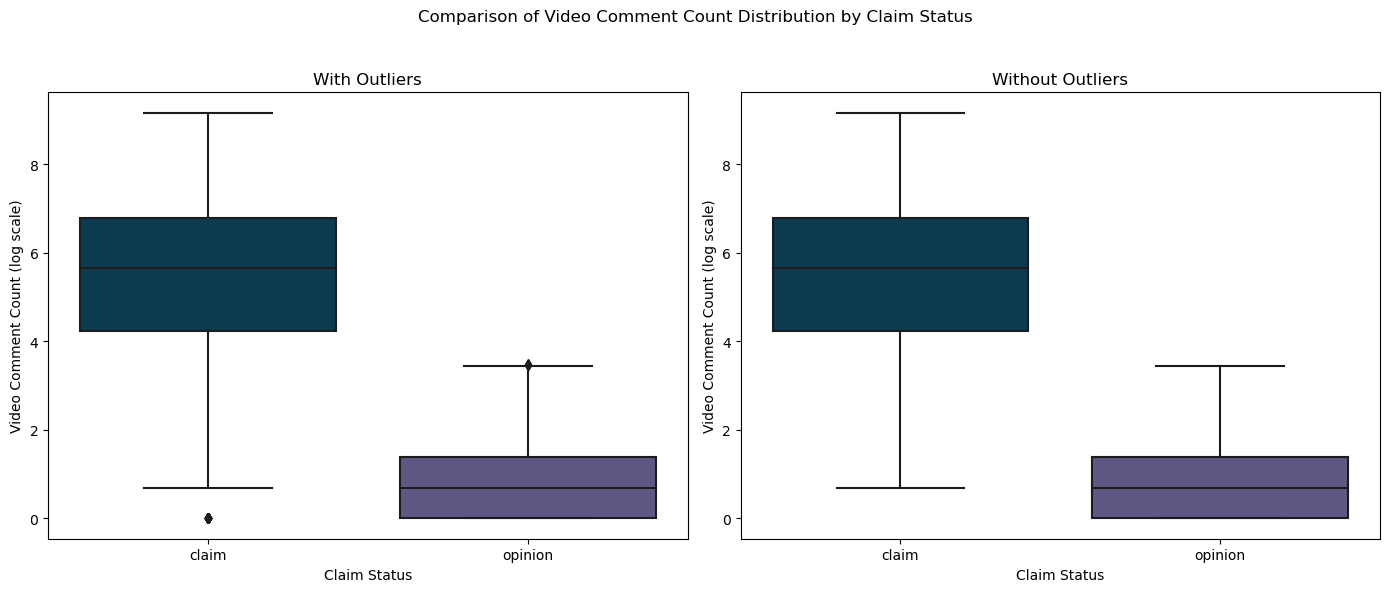

In [121]:
# Create boxplots to visualize distribution of `video_comment_count` with and without outliers
plt.figure(figsize=(14, 6))

# boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='claim_status', y='log_video_comment_count', data=data, showfliers=True)
plt.xlabel('Claim Status')
plt.ylabel('Video Comment Count (log scale)')
plt.title('With Outliers')

# boxplot without outliers 
plt.subplot(1, 2, 2)
sns.boxplot(x='claim_status', y='log_video_comment_count', data=data, showfliers=False)
plt.xlabel('Claim Status')
plt.ylabel('Video Comment Count (log scale)')
plt.title('Without Outliers')

plt.suptitle('Comparison of Video Comment Count Distribution by Claim Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [122]:
# Check for and handle outliers for log_video_like_count

Q1 = data['log_video_like_count'].quantile(0.25)
Q3 = data['log_video_like_count'].quantile(0.75)
IQR = Q3 - Q1
median = data['log_video_like_count'].median()

lower_threshold = median - 1.5 * IQR
upper_threshold = median + 1.5 * IQR

log_like_outliers = ((data['log_video_like_count'] < lower_threshold) | (data['log_video_like_count'] > upper_threshold))

num_outliers = log_like_outliers.sum()
percent_outliers = (num_outliers / len(data['log_video_like_count'])) * 100

# Print results
print(f"Number of outliers in log_video_like_count: {num_outliers}")
print(f"Percentage of outliers in log_video_like_count: {percent_outliers:.2f}%")


Number of outliers in log_video_like_count: 4
Percentage of outliers in log_video_like_count: 0.02%


In [123]:
# Since they represent only .02% of the dataset my approach is to remove the outliers
data_clean = data[~log_like_outliers].copy()

# Reset the index of the cleaned dataset
data_clean.reset_index(drop=True, inplace=True)

# Verify the removal
print(f"\nOriginal dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {data_clean.shape}")


Original dataset shape: (19084, 17)
Cleaned dataset shape: (19080, 17)


Check class balance.

In [124]:
# check for duplicates
duplicated_rows = data_clean.duplicated()

# number of duplicate rows
num_duplicated = duplicated_rows.sum()
print(f'Number of duplicate rows: {num_duplicated}')

Number of duplicate rows: 0


In [125]:
# Check class balance for log_video_comment_count
grouped_comment_data=data_clean.groupby(['verified_status', 'claim_status'])['log_video_comment_count'].count()
grouped_comment_data

verified_status  claim_status
not verified     claim           9398
                 opinion         8482
verified         claim            209
                 opinion          991
Name: log_video_comment_count, dtype: int64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [126]:
# Use resampling to create class balance in the outcome variable, if needed
from sklearn.utils import resample

# Identify data points from majority and minority classes
verified=data_clean[data_clean['verified_status'] == 'verified']
unverified=data_clean[data_clean['verified_status'] == 'not verified']

# determine number of samples needed for balance
n_samples = len(unverified)

# separate the minority class into claim and opinion
verified_claim = verified[verified['claim_status'] == 'claim']
verified_opinion = verified[verified['claim_status'] == 'opinion']

# determine the proportion of claim and opinion in the verified class
claim_proportion = len(verified_claim)/ len(verified)
opinion_proportion = len(verified_opinion)/ len(verified)

# Upsample the minority class (which is "verified") while maintaining respective claim/opinion proportion
verified_claim_upsampled = resample(verified_claim,
                                    replace=True,
                                    n_samples=int(n_samples * claim_proportion),
                                    random_state=42)

verified_opinion_upsampled = resample(verified_opinion,
                                      replace=True,
                                      n_samples=int(n_samples * opinion_proportion),
                                      random_state=42)

# combine the upsampled verified data
verified_upsampled = pd.concat([verified_claim_upsampled, verified_opinion_upsampled])

# Combine majority class with upsampled minority class
balanced_data = pd.concat([unverified, verified_upsampled])

# shuffle to ensure random distribution post-concatenation 
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new balanced class counts 
print('New Balanced Class Proportions:')
print(balanced_data['verified_status'].value_counts(normalize=True))
print()
print('New Balanced Class Counts By Verified and Claim Status:')
print(balanced_data.groupby(['verified_status', 'claim_status']).size())
print()

# check for the approx expected number of samples
print('Checking sum:')
print(f'Total samples in balanced data: {len(balanced_data)}')
print(f'Approximate expected samples: {len(unverified) * 2}')

New Balanced Class Proportions:
verified_status
not verified    0.500014
verified        0.499986
Name: proportion, dtype: float64

New Balanced Class Counts By Verified and Claim Status:
verified_status  claim_status
not verified     claim            9398
                 opinion          8482
verified         claim            3114
                 opinion         14765
dtype: int64

Checking sum:
Total samples in balanced data: 35759
Approximate expected samples: 35760


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [127]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
print('Average video_transcription_text length by verified and claim status:')
balanced_data.groupby(['verified_status', 'claim_status'])['video_transcription_text'].apply(lambda x: x.str.len().mean())

Average video_transcription_text length by verified and claim status:


verified_status  claim_status
not verified     claim           95.387423
                 opinion         82.774228
verified         claim           94.977200
                 opinion         82.302133
Name: video_transcription_text, dtype: float64

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [128]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
balanced_data['video_transcribed_length'] = balanced_data['video_transcription_text'].str.len()

In [129]:
# Display first few rows of dataframe after adding new column
balanced_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,log_video_view_count,log_video_like_count,log_video_share_count,log_video_download_count,log_video_comment_count,video_transcribed_length
0,3143,claim,7449067498,31,someone learned on an internet forum that the...,not verified,banned,150677.0,57395.0,323.0,210.0,23.0,11.922900,10.957730,5.780744,5.351858,3.178054,95
1,13617,opinion,2398587342,29,my friends' view is that the eiffel tower gets...,not verified,active,6916.0,2455.0,679.0,61.0,11.0,8.841737,7.806289,6.522093,4.127134,2.484907,71
2,8128,claim,3839605902,40,i encountered a story claiming that the red-bi...,not verified,active,294413.0,27376.0,10184.0,589.0,102.0,12.592742,10.217459,9.228671,6.380123,4.634729,90
3,16944,opinion,2560323885,17,my colleagues' hypothesis is that evidence fro...,verified,active,7464.0,1725.0,663.0,32.0,2.0,8.917981,7.453562,6.498282,3.496508,1.098612,104
4,2705,claim,4246742960,8,a friend read in a discussion board that the ...,not verified,active,257592.0,163342.0,3081.0,3824.0,1775.0,12.459136,12.003608,8.033334,8.249314,7.482119,117


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

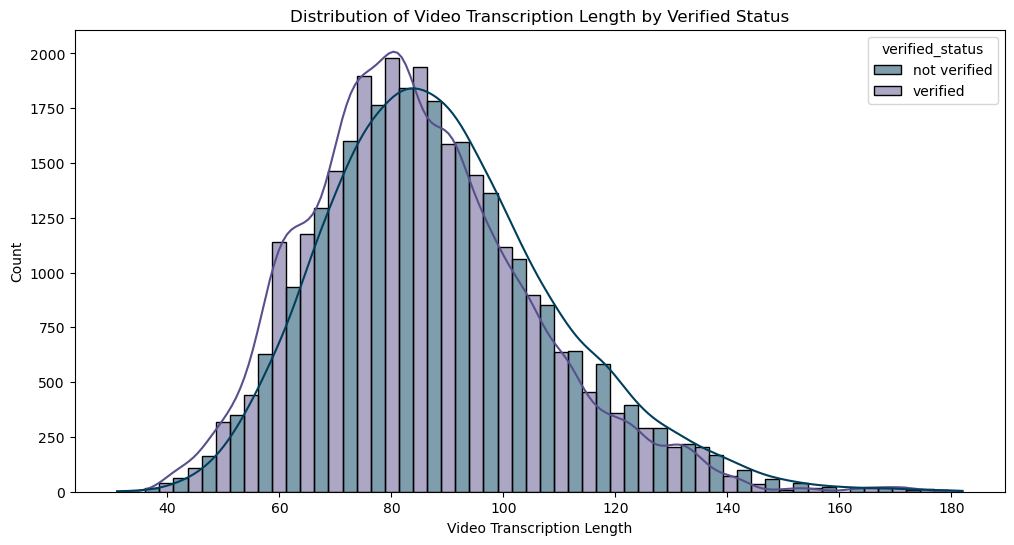

In [130]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
plt.figure(figsize=(12,6))

sns.histplot(data=balanced_data, x='video_transcribed_length', hue='verified_status', multiple='dodge', kde=True, bins=30)

plt.xlabel('Video Transcription Length')
plt.ylabel('Count')
plt.title('Distribution of Video Transcription Length by Verified Status')

plt.show() 

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [131]:
# create a set of numeric features for the log transformed engagement data, video duration and video transcription length
numeric_features = ['video_duration_sec', 'log_video_view_count', 'log_video_like_count', 'log_video_share_count', 'log_video_download_count', 'log_video_comment_count','video_transcribed_length']

In [132]:
# separate the claims and opinions for more insight
claims_data = balanced_data[balanced_data['claim_status'] == 'claim']
opinions_data = balanced_data[balanced_data['claim_status'] == 'opinion']

In [230]:
# Code a correlation matrix to help determine most correlated variables amongst claims data
# from pandas.plotting import scatter_matrix
# These are commented out as they are noisy and not nearly as helpful as the correlation matrices below. Uncomment to see scatter

# plt.figure(figsize=(20, 20))
# scatter_matrix(claims_data[numeric_features], figsize=(20, 20), diagonal='kde', color='#003f5c')
# plt.tight_layout()
# plt.show()

In [232]:
# See if there are differences in correlations in opinion data
# These are commented out as they are noisy and not nearly as helpful as the correlation matrices below. Uncomment to see scatter

# plt.figure(figsize=(20, 20))
# scatter_matrix(opinions_data[numeric_features], figsize=(20, 20), diagonal='kde', color='#bc5090')
# plt.tight_layout()
# plt.show()

Visualize a correlation heatmap of the data.

In [135]:
from matplotlib.colors import LinearSegmentedColormap

# expand color theme as necessary for heatmap
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", colors, N=256)

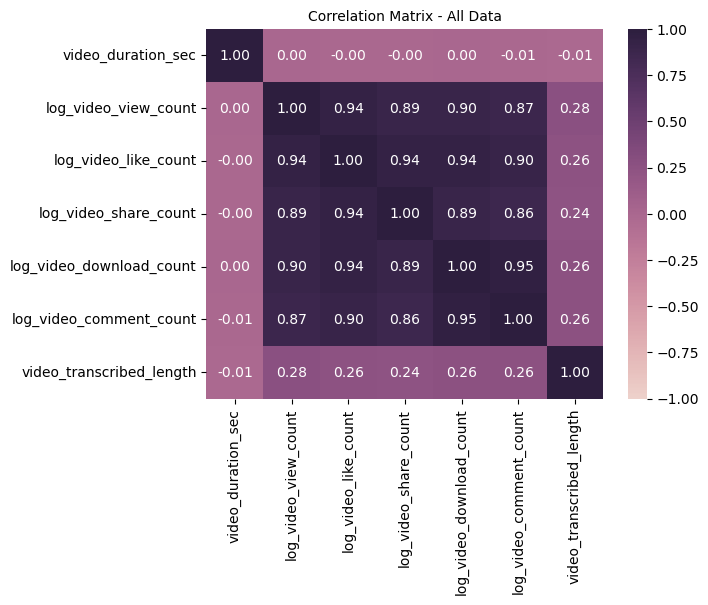

In [136]:
balanced_corr = balanced_data[numeric_features].corr()

ax = sns.heatmap(balanced_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f", vmin=-1, vmax=1, center=0)
ax.set_title('Correlation Matrix - All Data', fontsize=10)

plt.show()

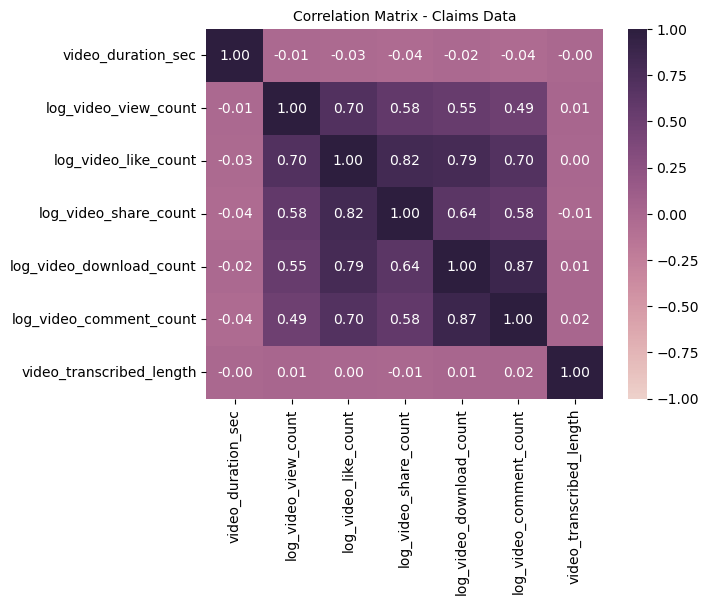

In [137]:
# Create a heatmap to visualize how correlated variables are
claims_corr = claims_data[numeric_features].corr()

# Plot claims_data
ax = sns.heatmap(claims_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f", vmin=-1, vmax=1, center=0)
ax.set_title('Correlation Matrix - Claims Data', fontsize=10)

# Display the plots
plt.show()

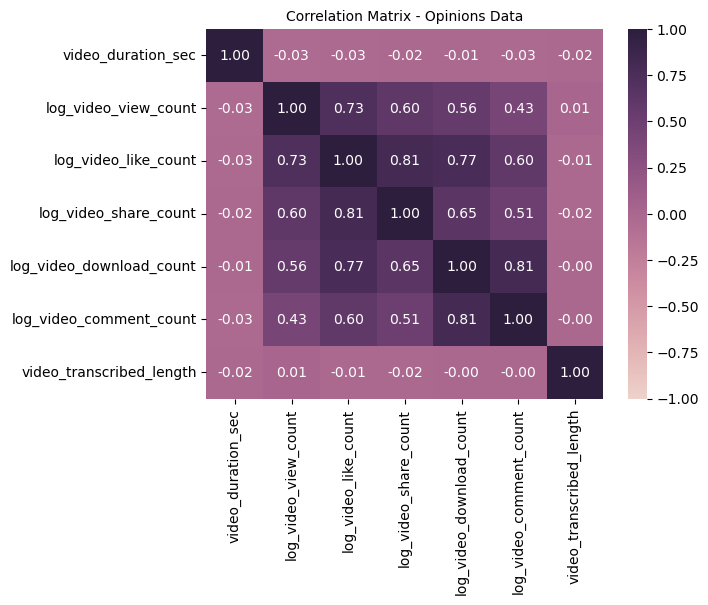

In [138]:
# Create a heatmap to visualize how correlated opinion data variables are
opinions_corr = opinions_data[numeric_features].corr()

# Plot  opinions_data
ax = sns.heatmap(opinions_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f", vmin=-1, vmax=1, center=0)
ax.set_title('Correlation Matrix - Opinions Data', fontsize=10)

# Display the plots
plt.show()

**Heatmap Correlation Matirx Conclusion**: The difference in correlations between the combined dataset and the separated claims/opinions datasets suggests that the claim/opinion status interacts significantly with other features. If the multicollinearity is not addressed it will make the logistic regression model less useful. 

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

**Answer:** When grouped together all the variables show significant correlation apart from video duration and transcribed length

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. 

### **Task 3a. Encode variables**

In [139]:
# Add a new column with an encoding of claim_status of claims set to 1 and opinions set to 0
balanced_data['is_claim'] = (balanced_data['claim_status'] == 'claim').astype(int)

In [140]:
#Add a new column encoding claim
balanced_data['is_verified'] = (balanced_data['verified_status'] == 'verified').astype(int)

In [142]:
# encode author ban status
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(balanced_data[['author_ban_status']])

# create new DataFrame with encoded features and concatenate with original
balanced_data = pd.concat([
    balanced_data.drop(columns=['author_ban_status']),
    pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['author_ban_status']),
                 index=balanced_data.index)
], axis=1)

balanced_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,video_view_count,video_like_count,video_share_count,video_download_count,...,log_video_view_count,log_video_like_count,log_video_share_count,log_video_download_count,log_video_comment_count,video_transcribed_length,is_claim,is_verified,author_ban_status_banned,author_ban_status_under review
0,3143,claim,7449067498,31,someone learned on an internet forum that the...,not verified,150677.0,57395.0,323.0,210.0,...,11.922900,10.957730,5.780744,5.351858,3.178054,95,1,0,1.0,0.0
1,13617,opinion,2398587342,29,my friends' view is that the eiffel tower gets...,not verified,6916.0,2455.0,679.0,61.0,...,8.841737,7.806289,6.522093,4.127134,2.484907,71,0,0,0.0,0.0
2,8128,claim,3839605902,40,i encountered a story claiming that the red-bi...,not verified,294413.0,27376.0,10184.0,589.0,...,12.592742,10.217459,9.228671,6.380123,4.634729,90,1,0,0.0,0.0
3,16944,opinion,2560323885,17,my colleagues' hypothesis is that evidence fro...,verified,7464.0,1725.0,663.0,32.0,...,8.917981,7.453562,6.498282,3.496508,1.098612,104,0,1,0.0,0.0
4,2705,claim,4246742960,8,a friend read in a discussion board that the ...,not verified,257592.0,163342.0,3081.0,3824.0,...,12.459136,12.003608,8.033334,8.249314,7.482119,117,1,0,0.0,0.0


In [143]:
# rename the under review column to remove the space
balanced_data.rename(columns={'author_ban_status_under review': 'author_ban_status_reviewing'}, inplace=True)

### **Task 3b. Initial Feature selection and feature engineering**

In [99]:
# Create a list of potentially interesting features 
# Considering NLP on the transcription text outside of the scope for now
# Removing non-log transformed engagement features because of data skew
# Removing the non-encoded categorical data
columns_to_keep = [
    'is_verified','video_duration_sec', 'author_ban_status_banned', 
    'author_ban_status_reviewing', 'video_transcribed_length', 'is_claim', 
    'log_video_view_count', 'log_video_like_count', 
    'log_video_share_count', 'log_video_download_count', 
    'log_video_comment_count'
]

# Create a new DataFrame with only the selected columns
subset_df = balanced_data[columns_to_keep].copy()

In [145]:
# create a set of the most interactive features
interactive_features = ['log_video_view_count', 'log_video_like_count', 'log_video_share_count', 'log_video_download_count', 'log_video_comment_count']

In [146]:
# Create interaction terms
subset_df_with_interactions = subset_df.copy()

# create interaction terms
for col in interactive_features:
    subset_df_with_interactions[f'{col}_claim_interX'] = subset_df_with_interactions[col] * subset_df_with_interactions['is_claim']

### **Task 3c. Feature scaling**

In [152]:
# Scale the features in prep for PCA
from sklearn.preprocessing import StandardScaler
def scale_numerical_features(df, exclude_columns=None):
    """
    Scales numerical features excluding specified columns. Input df is scaled in place
    arg: a df
    returns: a df
    """
    df = df.copy()
    
    # columns that should not be scaled
    if exclude_columns is None:
        exclude_columns = []
    
     # separate the columns to exclude
    excluded_df = df[exclude_columns]
    df_to_scale = df.drop(columns=exclude_columns)
    
    # scale the remaining columns
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns, index=df.index)
    
    # concatenate back the excluded columns
    return pd.concat([df_scaled, excluded_df], axis=1)

In [153]:
# scale the data
exclude_columns = ['is_verified', 'is_claim', 'author_ban_status_reviewing', 'author_ban_status_banned']
scaled_df = scale_numerical_features(subset_df_with_interactions, exclude_columns)

### **Task 3e. Train-test split**

Split the data into training and testing sets.

In [159]:
# Split the data into training and testing sets for the model with all the features
X_all = scaled_df.drop('is_verified', axis=1)
y_all = scaled_df['is_verified']
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

Confirm that the dimensions of the training and testing sets are in alignment.

In [160]:
# Get shape of each training and testing set for the model with all the features
print("All Features Model:")
print(f"Training set shape: {X_all_train.shape}")
print(f"Testing set shape: {X_all_test.shape}")

All Features Model:
Training set shape: (28607, 15)
Testing set shape: (7152, 15)


### **Task 3f. Model building**

Construct a model and fit it to the training set.

In [162]:
# Construct a logistic regression model and fit it to the training set for the model with all the features
# using L1 penalty (Lasso) to account for multicollinearity
# using LogisitcRegressionCV to use cross-validation to automatically select the best hyperparameters
# cross folding or splitting the data into 5 folds so its evaluated 5 times
# using saga solver which is good for L1 penalty
from sklearn.linear_model import LogisticRegressionCV

all_features_model = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', random_state=42, max_iter=5000)
all_features_model.fit(X_all_train, y_all_train)

LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1', random_state=42,
                     solver='saga')

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [80]:
# convert target variables back to integers from floats
y_pca_train = y_pca_train.astype(int)
y_pca_test = y_pca_test.astype(int)

In [215]:
# Create a function to evaluate the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    '''
    Evaluate the model with various metrics and displays detailed results.
    '''
    print(f"\n{model_name} Evaluation:")
    
    # get predictions on the testing set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # display the predictions on the first 20 in testing set
    print("Predictions on test set (first 20):")
    print(y_pred[:20])
    
    # display the true labels of the first 20 testing set
    print("\nTrue labels of test set (first 20):")
    print(y_test[:20].values)
    
    # calculate and print various performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print("\nPerformance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # cv score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"\nCross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # feature importance
    if hasattr(model, 'coef_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': abs(model.coef_[0]),
            'coefficient': model.coef_[0]
        }).sort_values('importance', ascending=False)
        print("\nTop 10 Important Features:")
        print(feature_importance.head(10))
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_scores': cv_scores,
        'y_pred': y_pred
    }

In [214]:
# Use the logistic regression model to get predictions on the encoded testing set with All features model
# Display the predictions on the encoded testing set
# Display the true labels of the testing set
# Get performance metrics
results = evaluate_model(all_features_model, X_all_train, X_all_test, y_all_train, y_all_test, "All Features Model")

# print everything except 'y_pred'
for key, value in results.items():
    if key != 'y_pred':
        print(f"{key}: {value}")


All Features Model Evaluation:
Predictions on test set (first 20):
[1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1]

True labels of test set (first 20):
[1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0]

Performance Metrics:
Accuracy: 0.6721
Precision: 0.6321
Recall: 0.8229
F1 Score: 0.7150
ROC AUC: 0.6926

Cross-validation ROC AUC: 0.6870 (+/- 0.0145)

Top 10 Important Features:
                                  feature  importance  coefficient
12                               is_claim    2.288883    -2.288883
11   log_video_comment_count_claim_interX    0.636679     0.636679
10  log_video_download_count_claim_interX    0.568387    -0.568387
7       log_video_view_count_claim_interX    0.566870     0.566870
8       log_video_like_count_claim_interX    0.440505    -0.440505
14               author_ban_status_banned    0.309601    -0.309601
9      log_video_share_count_claim_interX    0.263973     0.263973
13            author_ban_status_reviewing    0.185056    -0.185056
6                 log_video_

### **Task 4b. Interpret model coefficients**

**Coefficient Analysis** 
- The is_claim coefficient is significant. This specifically suggest that claim related videos are strong associated with non-verified users. It also suggests opinions are more likely to be posted by verified creators whereas claims are more likely associated with unverified creators. The high coefficients of the claim interaction features further support the strong relationship between claim status and verification status. 
- log video coment count claim interaction indicates that as the log of video comment counts increase in the context of a claim it positively influences the likelihood of being verified. The more comments a claim receives the more likely the user is verified, despite the negative impact of being a claim overall.
- log video download count claim interaction's negative coefficient suggests that for claims an increase in the number of downloads decreaseas the lieklihood of being verified. So unlike with comments, claims with more downloads are associated with unverified users.


Overall the mixed impact of claims and engagement suggests that while generally reducing the likelihood of vering verified (as indicated by the is_claim coefficient) certain types of engagement with claims content can still have a positive impact on verification (eg comments and views)

[[1866 1712]
 [ 633 2941]]


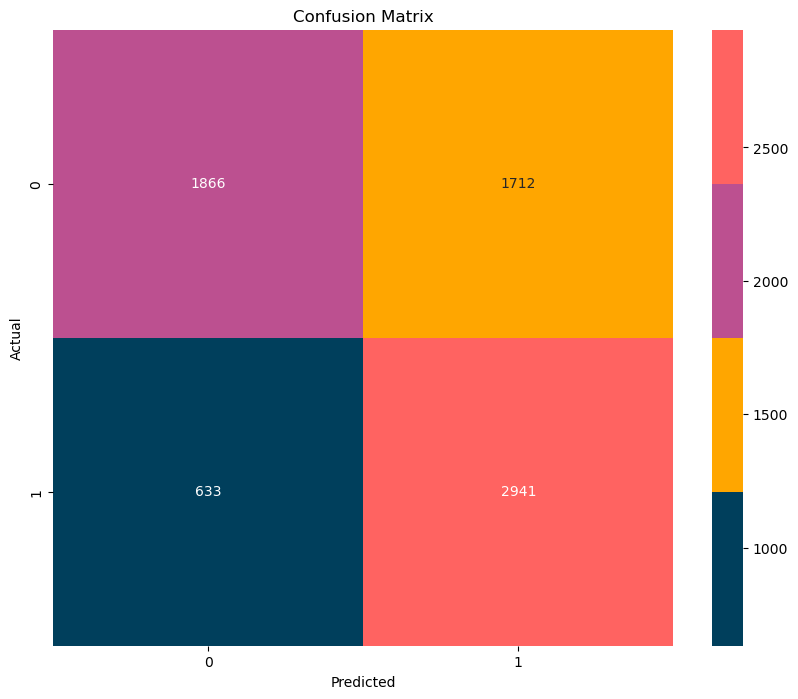

In [211]:
# compute values for confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# use my predefined colors
colors_subset = ListedColormap(["#003f5c", "#ffa600", "#bc5090", "#ff6361"])

# extract y_pred from the results
y_pred = results['y_pred']

cm = confusion_matrix(y_all_test, y_pred)

# Create display of confusion matrix
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=colors_subset)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Display plot
plt.show()

**Confusion matrix report**
- True negatives: 1866
- True positives: 2941
- False negatives: 633
- False positives:  1712

Since there are a high number of false positives, (1,712) the precision for predicting verified instances is likely to be low so when the model predicts a user is verified it will often be wrong

The model correctly identifies 2,941 verified but misses 633 so its recall is high but not perfect.

The large number of false positives to true negatives implies the model struggles to correctly identify unverified instances. I might suggest threshold tuning or weight class adjustment or using a more adavanced model to capture non linear relationships

### **Task 4c. Model splitting**

Given the overwhelming impact of is_claim data on the model it appears two models might be helpful. One for claims and one for opinions

In [174]:
# create  a list of interaction terms to remove
interaction_terms = [
    'log_video_view_count_claim_interX',
    'log_video_like_count_claim_interX',
    'log_video_share_count_claim_interX',
    'log_video_download_count_claim_interX',
    'log_video_comment_count_claim_interX'
]

In [175]:
# remove interaction terms and 'is_claim' from the dataframe
columns_to_keep = [col for col in scaled_df.columns if col not in interaction_terms and col != 'is_claim']

# separate the data into claims and opinions
claims_df = scaled_df[scaled_df['is_claim'] == 1][columns_to_keep]
opinions_df = scaled_df[scaled_df['is_claim'] == 0][columns_to_keep]

In [183]:
# function to split data, create and fit model
from sklearn.utils.class_weight import compute_class_weight

def create_and_fit_model(df, random_state=42):
    X = df.drop('is_verified', axis=1)
    y = df['is_verified']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))
    
    # Create and fit the model with computed class weights
    model = LogisticRegressionCV(cv=5, penalty='l2', solver='saga', random_state=random_state, 
                                 max_iter=10000, class_weight=class_weight_dict,
                                 Cs=np.logspace(-4, 4, 20))
    model.fit(X_train, y_train)
    
    return model, X_train, X_test, y_train, y_test

In [184]:
# create and fit model for claims
claims_model, X_claims_train, X_claims_test, y_claims_train, y_claims_test = create_and_fit_model(claims_df)

In [185]:
# create and fit model for opinions
opinions_model, X_opinions_train, X_opinions_test, y_opinions_train, y_opinions_test = create_and_fit_model(opinions_df)

In [187]:
# evaluate claims model
evaluate_model(claims_model, X_claims_train, X_claims_test, y_claims_train, y_claims_test, "Claims Model")


Claims Model Evaluation:
Predictions on test set (first 20):
[1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]

True labels of test set (first 20):
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1]

Performance Metrics:
Accuracy: 0.5142
Precision: 0.2687
Recall: 0.6040
F1 Score: 0.3719
ROC AUC: 0.5742

Cross-validation ROC AUC: 0.5611 (+/- 0.0245)

Top 10 Important Features:
                       feature  importance
8     author_ban_status_banned    0.177175
7  author_ban_status_reviewing    0.099075
6      log_video_comment_count    0.087148
4        log_video_share_count    0.085841
5     log_video_download_count    0.069002
2         log_video_view_count    0.041357
1     video_transcribed_length    0.011517
3         log_video_like_count    0.010805
0           video_duration_sec    0.003668


{'accuracy': 0.5141829804234919,
 'precision': 0.26865671641791045,
 'recall': 0.6040268456375839,
 'f1': 0.371900826446281,
 'roc_auc': 0.5741598420513615,
 'cv_scores': array([0.55935103, 0.56314239, 0.56610799, 0.57736241, 0.53976939])}

In [192]:
# Test whether GridSearchCV-tuned logistic regression on the claims model provides better results
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid, cv=5)
lr_grid.fit(X_claims_train, y_claims_train)
print("Best parameters:", lr_grid.best_params_)
y_pred_grid = lr_grid.predict(X_claims_test)
print("Logistic Regression with GridSearchCV:")
print(classification_report(y_claims_test, y_pred_grid, zero_division=0))

Best parameters: {'C': 0.01, 'penalty': 'l1'}
Logistic Regression with GridSearchCV:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1907
           1       0.00      0.00      0.00       596

    accuracy                           0.76      2503
   macro avg       0.38      0.50      0.43      2503
weighted avg       0.58      0.76      0.66      2503



In [188]:
# evaluate opinion model
evaluate_model(opinions_model, X_opinions_train, X_opinions_test, y_opinions_train, y_opinions_test, "Opinions Model")


Opinions Model Evaluation:
Predictions on test set (first 20):
[1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0]

True labels of test set (first 20):
[1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0]

Performance Metrics:
Accuracy: 0.5335
Precision: 0.6582
Recall: 0.5461
F1 Score: 0.5969
ROC AUC: 0.5298

Cross-validation ROC AUC: 0.5261 (+/- 0.0069)

Top 10 Important Features:
                       feature  importance
6      log_video_comment_count    0.161011
2         log_video_view_count    0.107150
4        log_video_share_count    0.101898
8     author_ban_status_banned    0.099053
3         log_video_like_count    0.094777
0           video_duration_sec    0.047601
7  author_ban_status_reviewing    0.024713
1     video_transcribed_length    0.014148
5     log_video_download_count    0.005730


{'accuracy': 0.5335483870967742,
 'precision': 0.6581967213114754,
 'recall': 0.5460727643658619,
 'f1': 0.5969150715480394,
 'roc_auc': 0.5298182373095692,
 'cv_scores': array([0.52382796, 0.52061194, 0.5287826 , 0.52746947, 0.53002239])}

In [191]:
# test whether GridSearchCV tuned logistic regression on the opinion model provides better results

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid, cv=5)
lr_grid.fit(X_opinions_train, y_opinions_train)
print("Best parameters:", lr_grid.best_params_)
y_pred_grid = lr_grid.predict(X_opinions_test)
print("Logistic Regression with GridSearchCV:")
print(classification_report(y_opinions_test, y_pred_grid, zero_division=0))

Best parameters: {'C': 0.001, 'penalty': 'l1'}
Logistic Regression with GridSearchCV:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1709
           1       0.63      1.00      0.77      2941

    accuracy                           0.63      4650
   macro avg       0.32      0.50      0.39      4650
weighted avg       0.40      0.63      0.49      4650



**Separate Modeling Conclusion** 
- Claims Model: This model has higher precision on unverified data 76% vs 63% but struggles with verified claims. The model is imbalanced in its predictions, favoring the majority class. Its high f1-score, of 86%, suggests the model is highly confident when predicting unverified claims, correctly identifying all unverified samples.

- Opinions Model: The model has about the preciion on verified class as the over model 63% vs 63%.  It completely misses unverified opinions. This imbalance in performance needs to be addressed. In addition fo its precision it has a good f1-score (0.77), meaning the model predicts verified opinions confidently.

- Next steps: Given their respective strengths and weaknesses an ensemble approach might be worth further investigation

### **Task 5. Investigating Non-Linearity**

In [227]:
# Try a Random Forest Classifier to test for non-linear relationships
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

def train_and_evaluate_rf(X_train, X_test, y_train, y_test, model_name="Random Forest", **kwargs):
    # initialize and fit
    rf = RandomForestClassifier(random_state=42, **kwargs)
    rf.fit(X_train, y_train)
    
    # stratified kfold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc')
    
    y_pred_rf = rf.predict(X_test)
    y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
    
    test_accuracy = rf.score(X_test, y_test)
    test_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
    test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
    
    print(f"\n{model_name} Results:")
    print(f"Cross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Test set accuracy: {test_accuracy:.4f}")
    print(f"Test set ROC AUC: {test_roc_auc:.4f}")
    print(f"Test set Balanced Accuracy: {test_balanced_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))
    
    print("\nPredicted class distribution:")
    print(pd.Series(y_pred_rf).value_counts(normalize=True))
    
    # feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))
    
    return rf, feature_importance

In [228]:
# call the Random Forest model 
rf_model, rf_feature_importance = train_and_evaluate_rf(X_all_train, X_all_test, y_all_train, y_all_test, n_estimators=100, max_depth=10, min_samples_split=5)


Random Forest Results:
Cross-validation ROC AUC: 0.8699 (+/- 0.0072)
Test set accuracy: 0.7183
Test set ROC AUC: 0.8635
Test set Balanced Accuracy: 0.7184

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.56      0.66      3578
           1       0.66      0.88      0.76      3574

    accuracy                           0.72      7152
   macro avg       0.74      0.72      0.71      7152
weighted avg       0.74      0.72      0.71      7152


Predicted class distribution:
1    0.661214
0    0.338786
Name: proportion, dtype: float64

Top 10 Important Features:
                                  feature  importance
9      log_video_share_count_claim_interX    0.137855
8       log_video_like_count_claim_interX    0.114863
7       log_video_view_count_claim_interX    0.100978
2                    log_video_view_count    0.094511
3                    log_video_like_count    0.081110
10  log_video_download_count_claim_interX    0.07

**Random Forest Conclusion** 
- The Random Forest model significantly otperforms the Logistic Regression across multiple metrics including accuracy, precision, recall and ROC AUC.
- The ROC AUC of 86.35% compared to the Logistic Regression ROC AUC of 69.2% suggest that the Random Forest captures more of the underlying patterns which might imply that the relationship between the selected features and verified status are non-linear. 

### **Task 6. Investigating The Upsampling Problem**

In [217]:
def verify_data_split(X_train, X_test, y_train, y_test):
    # 1. check for overlapping indices
    overlap = X_train.index.intersection(X_test.index)
    print(f"Number of overlapping indices: {len(overlap)}")
    if len(overlap) > 0:
        print("Warning: There are overlapping indices between train and test sets!")

    # 2. verify shapes
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Testing labels shape: {y_test.shape}")

    # 3. check for duplicate rows
    train_duplicates = X_train.duplicated().sum()
    test_duplicates = X_test.duplicated().sum()
    print(f"Number of duplicate rows in training set: {train_duplicates}")
    print(f"Number of duplicate rows in testing set: {test_duplicates}")

    # 4. check for exact matches between train and test sets
    exact_matches = pd.merge(X_test.drop_duplicates(), X_train.drop_duplicates(), how='inner').shape[0]

    print(f"Number of exact matches between train and test sets: {exact_matches}")

    # 5. verify label distribution
    print("\nLabel distribution in training set:")
    print(y_train.value_counts(normalize=True))
    print("\nLabel distribution in testing set:")
    print(y_test.value_counts(normalize=True))

In [218]:
# confirm training and test sets are properly separateed and there no data leakage between them
verify_data_split(X_all_train, X_all_test, y_all_train, y_all_test)

Number of overlapping indices: 0
Training set shape: (28607, 15)
Testing set shape: (7152, 15)
Training labels shape: (28607,)
Testing labels shape: (7152,)
Number of duplicate rows in training set: 13105
Number of duplicate rows in testing set: 2443
Number of exact matches between train and test sets: 1131

Label distribution in training set:
is_verified
1    0.500052
0    0.499948
Name: proportion, dtype: float64

Label distribution in testing set:
is_verified
0    0.50028
1    0.49972
Name: proportion, dtype: float64


**Data Conclusion** The analysis of the overlap between the test and training set indicated by the 1,131 exact matches (~15.8% of the training set and ~4% of the test set). This is a form of data leakage that might be leading to over-optimistic views across perfromance metrics. 

Upon further investigation, this likely occured because the data was upsampled (creating synthetics across both test and training) before being split. 

**Alternative Approach** Going forward my alternative approach would be to first split, then upsample the training set (using SMOTE) to handle the class imbalance betewen verified and unverified class. The downside of this approach is it would leave us with a smaller amount of verified data in the test set. 

### **Task 7. Conclusion**

1. Key takeaways from this project?
- Both Logistic Regression and Random Forest models identify is_claim and interactive terms like log video share count claim interaction as important, suggesting that claim status has a strong relationship with verification status.
- The importance of these features vary however between the two models implying that the relationships are not strictly linear
- Its worth noting the Random Forest models performance is quite high and given they can tend to overfit
- One possible reason for overoptimistic model performance could be the fact that there are 1,131 exact matches across the test and training set.
- While separating the data by claims status and running a logisitc regression generated slightly better precision results for the claims data relative to the all data model it was about the same for opinion data.
- NLP on the transcription text might be helpful 

2. Results that should be presented from this project?
- The heat map correlation matrices should be shown because they succinctly capture the multicollinearity across the features available for use in a logistic regression model.
- The confusion matrix should be used to highlight the high number of false positives and a logistic regressions inability to predict verified status reliably.
- The classification and performance metrics of both the logistic regression and the random forest model should be shown as together they indicate the potential limits of linear models in explaining the relationship between the dataset features and verification status
- The overlap due to upsampling should be shown to highlight the potential data leakage due to exact matches acrosss test and training sets and the impact it might have on the model results. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 